Using the “clustering_data.csv” file, cluster it using k-means by following these steps :

    Read the file and check its characteristics
    Execute the elbow method with k-means
    Execute k-means with the value that you see fits from the elbow method


In [1]:
import pandas as pd

#### Read the file

In [4]:
df = pd.read_csv("inputs/clustering_data.csv")
df.head()

,-5.462513918787130329e+00,-8.113541922364099435e+00
0,-1.730536,1.619807
1,-1.178714,4.515808
2,-6.460586,-3.068022
3,-1.539308,5.260561
4,-11.067681,-4.651872


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 2 columns):
-5.462513918787130329e+00    9999 non-null float64
-8.113541922364099435e+00    9999 non-null float64
dtypes: float64(2)
memory usage: 156.4 KB


In [7]:
import matplotlib.pyplot as plt

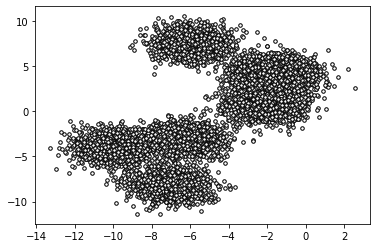

In [13]:
plt.scatter(
   df.iloc[:,0].values,
   df.iloc[:,1].values,
   c='white', marker='.',
   edgecolor='black', s=50
)

#### Elbow method with k-means

In [14]:
from sklearn.cluster import KMeans

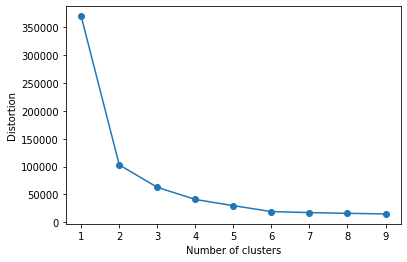

In [20]:
# calculate the distortio for a given range of clusters
def elbow(nb_clusters, n_init=10,max_iter=100,tol=1e-04,random_state=43):
    distortions = []
    
    for i in range(1,nb_clusters):
        model = KMeans(
            n_clusters=i, init="random",
            n_init=n_init , max_iter=max_iter,
            tol=tol , random_state=random_state
        )
        model.fit(df)
        distortions.append(model.inertia_)
    # Plot the results
    plt.plot(range(1, nb_clusters), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
elbow(nb_clusters=10)

As we can see the distortion started to decrease rapidly from k = 2

### Executing K-means with k= 2

In [21]:
model = KMeans(
    n_clusters=2, init="random",
    n_init=10,max_iter=100,
    tol=1e-04,random_state=43
)

y_pred = model.fit_predict(df)

array([[-1.73053608,  1.61980653],
       [-1.17871379,  4.51580823],
       [-6.46058589, -3.06802242],
       ...,
       [-7.3444646 ,  7.68961725],
       [-1.75459651, -0.57769144],
       [-0.93934452,  1.28229718]])

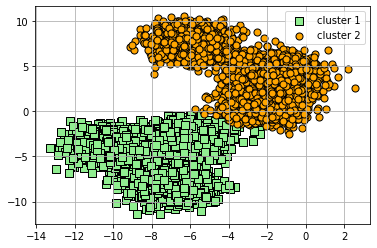

In [31]:
# Plot the 2 clusters
# plot the 3 clusters
plt.scatter(
    df.values[y_pred == 0, 0], df.values[y_pred == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df.values[y_pred == 1, 0], df.values[y_pred== 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()